## Prueba de modelos ##

### Version 4: Modelo con 2 DER, planificación anual, granularidad horaria ###

Si el modelo tiene que optimizar el balance por horas, tiene 8640 VD, pero sigue teniendo 2 VD binarias

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandapower as pp

In [4]:
import os

In [5]:
import pandas as pd

In [6]:
import pyomo.environ as pe

In [7]:
import math

In [8]:
import random

In [9]:
import itertools

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
import ModelWriters.SimpleBusbar

Variables que define el modelo:

y para el año

d para el día del año

h para la hora del día

dt la granularidad del modelo, en horas


temp la temperatura

wv la velocidad del viento

I la irradiación solar


eg el crecimiento económico en pu respecto al año 0


Estas variables llegan como parámetros en forma de diccionario en el argumento 'model_status' (ver este nombre)

Todas las funciones reciben este argumento, la lógica de la función indica que valor retorna. Pr ejemplo, si la granularidad es 24 h, debe retornar el valor medio del parámetro producido.

## Construcción de Escenarios

In [13]:
import ModelWriters.Simulation.Solar as Solar
import ModelWriters.Simulation.Demand as Demand

In [235]:
dias = 365
años = 5

In [236]:
#el rango de horas:
T_i = range(24)

#el rango de dias:
Dias_i = range(dias)

Escenarios_i = range(len(T_i)*len(Dias_i))

In [237]:
m_s_base = [{'y': 0, 'd': 0, 'dd':1.0, 'h': 0.0, 'dt': 1.0, 'temp': 20.0, 'I':1000.0, 'wv': 10.0, 'eg': 1.0}]

registros = len(Dias_i)*len(T_i)

Escenarios =  pd.DataFrame(m_s_base, index = Escenarios_i)

reg = 0
for d in Dias_i:
    for h in T_i:
        Escenarios['d'][reg] = d
        Escenarios['h'][reg] = h
        Escenarios['I'][reg] = Solar.solar_irradiance_seasoned_randomized(d, h)
        Escenarios['wv'][reg] = random.uniform(1.0, 20.0)
        reg += 1

In [238]:
Escenarios

,y,d,dd,h,dt,temp,I,wv,eg
0,0,0,1.0,0.0,1.0,20.0,0.000000,10.969606,1.0
1,0,0,1.0,1.0,1.0,20.0,0.000000,19.435814,1.0
2,0,0,1.0,2.0,1.0,20.0,0.000000,14.005674,1.0
3,0,0,1.0,3.0,1.0,20.0,0.000000,9.258574,1.0
4,0,0,1.0,4.0,1.0,20.0,0.000000,11.095207,1.0
...,...,...,...,...,...,...,...,...,...
8755,0,364,1.0,19.0,1.0,20.0,223.931048,12.769612,1.0
8756,0,364,1.0,20.0,1.0,20.0,18.459321,15.321964,1.0
8757,0,364,1.0,21.0,1.0,20.0,0.000000,3.091098,1.0
8758,0,364,1.0,22.0,1.0,20.0,0.000000,17.177544,1.0


## Model Tests

In [ ]:
from ModelWriters.Resources.ExtGrid import ExtGrid

In [ ]:
from ModelWriters.Resources.Load import Load

In [ ]:
from ModelWriters.Resources.BaseGen import Generator, DiscreteGenerator

In [ ]:
from ModelWriters.Resources.Storage import Storage

In [ ]:
model = pe.ConcreteModel()

In [ ]:
exg = ExtGrid('EXT')

In [ ]:
bg = Generator('GEN')

In [ ]:
dg = DiscreteGenerator('DGEN')

In [ ]:
load = Load('LOAD')

In [ ]:
storage = Storage('STORAGE')

In [ ]:
exg['pr_mw'] = 5.0
exg['ic_0_mu'] = 1.2
exg['ic_1_mu'] = 0.2
exg['oc_0_mu'] = 0.001
exg['oc_1_mu'] = 0.005

#exg.pa_pu = wind_output

In [ ]:
load['pr_mw'] = .5
load['ic_0_mu'] = 1.2
load['ic_1_mu'] = 0.2
load['oc_0_mu'] = 0.001
load['oc_1_mu'] = 0.005
load['pa_pu'] = Demand.scalonated_seasoned_randomized_demand

#exg.pa_pu = wind_output

In [ ]:
dg['ic_0_mu'] = 0.44
dg['ic_1_mu'] = 0.2
dg['unit_cost_mu'] = 0.3
dg['oc_0_mu'] = 0.001
dg['oc_1_mu'] = 0.005

In [ ]:
exg.initialize_model(model, Escenarios)

In [ ]:
bg['pr_mw'] = 5.0
bg['ic_0_mu'] = 1.2
bg['ic_1_mu'] = 0.2
bg['oc_0_mu'] = 0.001
bg['oc_1_mu'] = 0.005


In [ ]:
bg.initialize_model(model, Escenarios)

In [ ]:
load.initialize_model(model, Escenarios)

In [ ]:
dg.initialize_model(model, Escenarios)

In [ ]:
load.available_power(10)

In [ ]:
bg.available_power(15)

In [ ]:
print(bg.initial_cost())

In [ ]:
print(load.initial_cost())

In [ ]:
print(bg.operating_cost(10))

In [ ]:
print(load.operating_cost(10))

In [ ]:
print(bg.active_power(10))

In [ ]:
print(load.active_power(10))

In [ ]:
storage.initialize_model(model, Escenarios)

In [ ]:
model.pprint()

## Line Model

In [51]:
from ModelWriters.Resources.SimpleLine import SimpleLine

In [52]:
model = pe.ConcreteModel()

In [53]:
sl = SimpleLine('Aquí', 'Allá')

In [54]:
print(sl)

Line: Aquí_Allá


In [55]:
sl.initialize_model(model, Escenarios)

In [56]:
model.pprint()

1 Set Declarations
    Aquí_Allá_pf_mw_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}

1 Var Declarations
    Aquí_Allá_pf_mw : Size=24, Index=Aquí_Allá_pf_mw_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :   1.5 :  None :  -1.5 : False :  True :  Reals
          1 :   1.5 :  None :  -1.5 : False :  True :  Reals
          2 :   1.5 :  None :  -1.5 : False :  True :  Reals
          3 :   1.5 :  None :  -1.5 : False :  True :  Reals
          4 :   1.5 :  None :  -1.5 : False :  True :  Reals
          5 :   1.5 :  None :  -1.5 : False :  True :  Reals
          6 :   1.5 :  None :  -1.5 : False :  True :  Reals
          7 :   1.5 :  None :  -1.5 : False :  True :  Reals
          8 :   1.5 :  None :  -1.5 : False :  True :  Reals
          9 :   1.5 :  None :  -1.5 : False :  True :  Re

## Line Cap Model

In [239]:
from ModelWriters.Resources.ExtGrid import ExtGrid
from ModelWriters.Resources.Load import Load
from ModelWriters.Resources.PV import PVGenerator
from ModelWriters.Resources.WT import WTGenerator
from ModelWriters.Simulation import ElectricityCost

In [240]:
net = pp.create_empty_network() 
b0 = pp.create_bus(net, vn_kv=13.2)

pp.create_ext_grid(net, bus=b0)

#ramal 1
b11 = pp.create_bus(net, vn_kv=13.2)
b12 = pp.create_bus(net, vn_kv=13.2)

pp.create_line(net, from_bus=b0, to_bus=b11, length_km=0.8, std_type="NAYY 4x50 SE")
pp.create_line(net, from_bus=b11, to_bus=b12, length_km=2.1, std_type="NAYY 4x50 SE")

pp.create_sgen(net, b11, p_mw=0.075, q_mvar=0.025, max_p_mw=0.15, max_q_mvar=0.15)
pp.create_load(net, bus=b12, p_mw=0.350)


#ramal 2
b21 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b21, length_km=5.0, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b21, p_mw=0.15, q_mvar=0.00, max_p_mw=0.40, max_q_mvar=0.10)
pp.create_storage(net, bus=b21, p_mw=0.25, q_mvar=0.1, max_e_mwh = 3.0)

#ramal 3
b31 = pp.create_bus(net, vn_kv=13.2)
b32 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b31, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_line(net, from_bus=b31, to_bus=b32, length_km=1.5, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b31, p_mw=0.08, q_mvar=0.00, max_p_mw=0.30, max_q_mvar=0.10)
pp.create_load(net, bus=b32, p_mw=0.85, q_mvar=0.33)


#ramal 4
b41 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b41, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_load(net, bus=b41, p_mw=0.22, q_mvar=0.05)
pp.create_storage(net, bus=b41, p_mw=0.5, q_mvar=0.1, max_e_mwh = 5.0)


1

In [241]:
def net_add_optfw(net):
    #agregamos parámetros para el modelo de optimización
    tables = [net.ext_grid, net.load, net.sgen, net.storage, net.line]

    for t in tables: 
        #initial cost
        t['model'] = None

net_add_optfw(net)

In [242]:
net.ext_grid['model'] = None
m = ExtGrid('SET')
m['pr_mw'] = 5.0
m['pa_pu'] = 1.0
m['oc_1_mu'] = ElectricityCost.fixed_scalonated_electricity_cost
net.ext_grid['model'][0] = m
net.ext_grid['name'][0] = 'SET'

m = Load('Tornquinst')
m['pa_pu'] = Demand.scalonated_seasoned_randomized_demand
m['pr_mw'] = net.load['p_mw'][0]
net.load['model'][0] = m


m = Load('Bell Ville')
m['pa_pu'] = Demand.scalonated_seasoned_randomized_demand
m['pr_mw'] = net.load['p_mw'][1]
net.load['model'][1] = m

m = Load('City Bell')
m['pa_pu'] = Demand.scalonated_seasoned_randomized_demand
m['pr_mw'] = net.load['p_mw'][2]
net.load['model'][2] = m

m = PVGenerator('PV1')
m.ic_0_mu = 0.5
m.ic_1_mu = 0.05
m.oc_0_mu = 0.0
m.oc_1_mu = 400e-6

net.sgen['name'][0] = m.name
net.sgen['model'][0] = m


m = PVGenerator('PV2')
m.ic_0_mu = 3.0
m.ic_1_mu = 0.75
m.oc_0_mu = 0.0
m.oc_1_mu = 500e-6

net.sgen['name'][2] = m.name
net.sgen['model'][2] = m

m = WTGenerator('WT1')
m.ic_0_mu = 5.0
m.ic_1_mu = 3.0
m.oc_0_mu = 0.0
m.oc_1_mu = 700e-6

net.sgen['name'][1] = m.name
net.sgen['model'][1] = m



"""
m = Storage.Storage('ST1')

m.pa_pu = 1.0
m.ic_0_mu = 0.5
m.ic_1_mu = 1.0
m.ic_1_mu_cap = 0.5
m.oc_0_mu = 0.0

net.storage['name'][0] = 'ST1'
net.storage['model'][0] = m


m = Storage.Storage('ST2')
net.storage['name'][1] = 'ST2'
net.storage['model'][1] = m

m.pa_pu = 1.0
m.ic_0_mu = 0.5
m.ic_1_mu = 2.0
m.ic_1_mu_cap = 7.0
m.oc_0_mu = 0.0
m.oc_1_mu = 1400e-6
"""
None


In [243]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,model
0,None,NAYY 4x50 SE,0,1,0.8,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None
1,None,NAYY 4x50 SE,1,2,2.1,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None
2,None,NAYY 4x50 SE,0,3,5.0,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None
3,None,NAYY 4x50 SE,0,4,0.5,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None
4,None,NAYY 4x50 SE,4,5,1.5,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None
5,None,NAYY 4x50 SE,0,6,0.5,0.642,0.083,210.0,0.0,0.142,1.0,1,cs,True,None


In [244]:
net.bus

,name,vn_kv,type,zone,in_service
0,None,13.2,b,None,True
1,None,13.2,b,None,True
2,None,13.2,b,None,True
3,None,13.2,b,None,True
4,None,13.2,b,None,True
5,None,13.2,b,None,True
6,None,13.2,b,None,True


In [245]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV1,1,0.075,0.025,NaN,1.0,True,wye,True,0.15,0.15,Resource: PV1
1,WT1,3,0.150,0.000,NaN,1.0,True,wye,True,0.40,0.10,Resource: WT1
2,PV2,4,0.080,0.000,NaN,1.0,True,wye,True,0.30,0.10,Resource: PV2


In [246]:
from ModelWriters.MultiBusbar import MultiBusbarModelWriter

In [247]:
mw = MultiBusbarModelWriter(net, Escenarios)

In [248]:
mw.create_model()

In [249]:
#mw.model.pprint()

In [250]:
#solver_manager = pe.SolverManagerFactory('neos')
#result_obj = solver_manager.solve(model.model, opt='cplex')

opt = pe.SolverFactory('cplex')
#opt = pe.SolverFactory('glpk')
result_obj= opt.solve(mw.model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmpmbe2mr_r.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpbxhzrdsb.pyomo.lp' read.
Read time = 0.19 sec. (8.78 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpbxhzrdsb.pyomo.lp
Objective sense      : Minimize
Variables            :   87607  [Nneg: 26284,  Box: 61320,  Binary: 3]
Objective nonzeros   :   35046
Linear constraints   :   87604  [Less: 26283,  Equal: 61321]
  Nonzeros           :  183030
  RHS nonzeros       :   26281

Variables            : Min LB: -2.811600        Max UB: 5.000000       
Objective

In [251]:
mw.backconfigure_network()

In [252]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV1,1,0.075,0.025,NaN,1.0,True,wye,True,16.171305,8.085652,Resource: PV1
1,WT1,3,0.150,0.000,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: WT1
2,PV2,4,0.080,0.000,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV2


In [255]:
Resultados = mw.get_scenes_results()

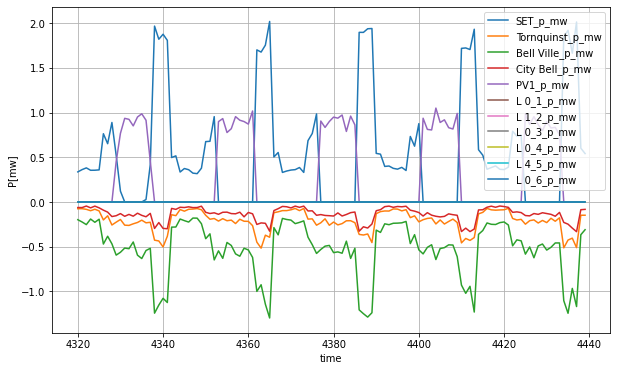

In [257]:
# Set the plot curve with markers and a title
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
a=180*24
#b=360
b=180*24+5*24
for col in Resultados:
    ax.plot(Resultados[col][a:b], label = col)

#ax.plot(Resultados['Tornquinst'][a:b]+Resultados['Bell Ville'][a:b]+Resultados['City Bell'][a:b], label = 'Load')

#ax.plot(Resultados['time'][240:360], Resultados['p_mw_PV'][240:360], label = 'PV')
#ax.plot(Resultados['time'][240:360], Resultados['p_mw_Load'][240:360], label = 'Load')

ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()

In [258]:
Resultados

,SET_p_mw,Tornquinst_p_mw,Bell Ville_p_mw,City Bell_p_mw,PV1_p_mw,L 0_1_p_mw,L 1_2_p_mw,L 0_3_p_mw,L 0_4_p_mw,L 4_5_p_mw,L 0_6_p_mw
0,0.380071,-0.100522,-0.213910,-0.065639,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.408193,-0.098501,-0.245345,-0.064347,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.369524,-0.093299,-0.222208,-0.054017,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357389,-0.091397,-0.211249,-0.054743,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.341229,-0.093875,-0.180631,-0.066723,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,0.000000,-0.458362,-0.970538,-0.287417,1.716317,0.0,0.0,0.0,0.0,0.0,0.0
8756,1.368255,-0.523460,-0.883383,-0.259924,0.298511,0.0,0.0,0.0,0.0,0.0,0.0
8757,1.751885,-0.518300,-0.939162,-0.294422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8758,0.511121,-0.113511,-0.316128,-0.081482,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Set the plot curve with markers and a title
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
a=180*24
#b=360
b=180*24+15*24
for col in Resultados:
    ax.plot(Resultados[col][a:b], label = col)

#ax.plot(Resultados['Tornquinst'][a:b]+Resultados['Bell Ville'][a:b]+Resultados['City Bell'][a:b], label = 'Load')

#ax.plot(Resultados['time'][240:360], Resultados['p_mw_PV'][240:360], label = 'PV')
#ax.plot(Resultados['time'][240:360], Resultados['p_mw_Load'][240:360], label = 'Load')

ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()